# 크롤링 테스트

In [ ]:
import os
import sys
import urllib.request
client_id = "_YYzIlLNJDHj9xSBuxsB"   # 본인이 등록한 애플리케이션의 client id를 입력해주세요.
client_secret = "8nFR35nZ4U"         # 본인이 등록한 애플리케이션의 client secret key를 입력해주세요.
encText = urllib.parse.quote("동덕여대")    # 본인이 검색할 키워드를 입력해주세요.
url = "https://openapi.naver.com/v1/search/blog?query=" + encText
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
"lastBuildDate": "Thu, 23 Sep 2021 16:19:55 +0900",
"total": 101193,
"start": 1,
"display": 10,
"items": [
{
"title": "호감이었던 <b>동덕여대</b> 맛집",
"link": "https:\/\/blog.naver.com\/ikqm77?Redirect=Log&logNo=222113902344",
"description": "며칠 전에는 친구와 함께 전부터 가보고 싶었던 <b>동덕여대</b> 맛집을 찾아 갔는데요. 퀄리티 좋은 육류는... 저희도 마음에 드는 자리에 앉아 벽에 붙어 있던 <b>동덕여대</b> 맛집 메뉴판을 살펴 봤습니다. 생각보다 종류가... ",
"bloggername": "바니아빠의 육아일기",
"bloggerlink": "https://blog.naver.com/ikqm77",
"postdate": "20201013"

},
{
"title": "<b>동덕여대</b> 피부관리 샵 추천 타라테라피",
"link": "https:\/\/blog.naver.com\/pooq87?Redirect=Log&logNo=222315247461",
"description": "해보자고 <b>동덕여대</b> 피부관리 샵을 찾았죠 월곡역 바로 앞에 있어서 집에서도 가까이 있고 후기를... 그러면 <b>동덕여대</b> 피부관리 샵 탐방 함께하시죠 월곡역 3번 출구에서 도보 1번 거리입니다 이 건물 2층에... ",
"bloggername": "열혈청년의 세상 탐험!",
"bloggerlink": "https://blog.naver.com/pooq87",
"postdate": "20210419"

},
{
"title": "이색적인 <b>동덕여대</b> 맛집",
"link": "https:\/\/blog.naver.com\/jinjja_joa?Redirect=Log&logNo=222057008728",
"description": "얼마전 요즘 중국 음식에 푹 빠져 있는

In [ ]:
# 요청변수 변경 가능
encText = urllib.parse.quote("keyword")    # 검색할 키워드
display = 10    # 최대 100 (기본값 10)      # 검색 결과 출력 건수
start = 1       # 최대 1000 (기본값 1)      # 검색 시작 위치
sort = 'sim'    # sim : 유사도순(기본값) / date : 날짜순
url = "https://openapi.naver.com/v1/search/blog?query=%s&display=%s&start=%s&sort=%s" %(encText, display, start, sort)

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
"lastBuildDate": "Thu, 23 Sep 2021 16:19:58 +0900",
"total": 1359801,
"start": 1,
"display": 10,
"items": [
{
"title": "[중등임용 전공영어] <b>Keyword</b> 정리 빌드업 Language... ",
"link": "https:\/\/blog.naver.com\/kmo7740?Redirect=Log&logNo=222447364392",
"description": "[영어교육론] <b>Keyword</b> 정리 빌드업 Language Analysis -discourse Analysis 저번시간에 저희는 Language Analysis중에서 Contrastive Analysis와 Error Analysis에 대해서 살펴보았는데요~ 오늘은... ",
"bloggername": "Dr. 유희태 중등임용 전공영어팀",
"bloggerlink": "https://blog.naver.com/kmo7740",
"postdate": "20210727"

},
{
"title": "키워드 선정 3가지 방법 (<b>Keyword</b>로 3개월만에 방문자수... ",
"link": "https:\/\/blog.naver.com\/behappyash?Redirect=Log&logNo=222510132906",
"description": "<b>keyword</b> ? 여러분들은 포스팅 작성시 키워드를 잡고 작성하시나요? 나는 포스팅도 자주하는데 왜... 대다수 분들이 <b>keyword</b>없이 포스팅 작성하시더라구요. 키워드가 없다면 검색시 노출이 안되고 내가 작성한... ",
"bloggername": "테스티박의 맛있는 이야기",
"bloggerlink": "https://blog.naver.com/behappyash",
"postdate": "20210918"

},
{
"title": "2030년, 디지털 소비자 5대 <b>Keyword</b>",
"link": "h

# 크롤링 실습

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 함수로 정의 / txt 파일로 저장

import re
import json
import math
import datetime
import requests
import urllib.request
import urllib.error
import urllib.parse
from bs4 import BeautifulSoup

client_id = "_YYzIlLNJDHj9xSBuxsB"
client_secret = "8nFR35nZ4U" 


def naver_blog_crawling(search_blog_keyword, display_count, sort_type):
    search_result_blog_page_count = get_blog_search_result_pagination_count(search_blog_keyword, display_count)
    get_blog_post(search_blog_keyword, display_count, search_result_blog_page_count, sort_type)


def get_blog_search_result_pagination_count(search_blog_keyword, display_count): #몇페이지가 나오는지
    encode_search_keyword = urllib.parse.quote(search_blog_keyword)
    url = "https://openapi.naver.com/v1/search/blog?query=" + encode_search_keyword
    request = urllib.request.Request(url)

    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)

    response = urllib.request.urlopen(request)
    response_code = response.getcode()

    if response_code is 200:
        response_body = response.read()
        response_body_dict = json.loads(response_body.decode('utf-8'))

        if response_body_dict['total'] == 0:    # 키워드에 해당하는 포스팅 수
            blog_pagination_count = 0
        else:
            blog_pagination_total_count = math.ceil(response_body_dict['total'] / int(display_count))   # 키워드에 해당하는 블로그 페이지 수
            # 블로그 글 1000개 이상이면 1000개만 수집
            if blog_pagination_total_count >= 1:
                blog_pagination_count=1
            else:
                blog_pagination_count = blog_pagination_total_count

        return blog_pagination_count


def get_blog_post(search_blog_keyword, display_count, search_result_blog_page_count, sort_type):
    iter1 = 0
    file = open("/content/drive/MyDrive/Colab Notebooks/crawling_naver_blog.txt","w", encoding='utf-8')
    
    encode_search_blog_keyword = urllib.parse.quote(search_blog_keyword)

    for i in range(1, search_result_blog_page_count + 1):
        url = "https://openapi.naver.com/v1/search/blog?query=" + encode_search_blog_keyword + "&display=" + str(
            display_count) + "&start=" + str(i) + "&sort=" + sort_type

        request = urllib.request.Request(url)

        request.add_header("X-Naver-Client-Id", client_id)
        request.add_header("X-Naver-Client-Secret", client_secret)

        response = urllib.request.urlopen(request)
        response_code = response.getcode()

        if response_code is 200:
            response_body = response.read()
            response_body_dict = json.loads(response_body.decode('utf-8'))
            

            for j in range(0, len(response_body_dict['items'])):
              
                try:
                    
                    blog_post_url = response_body_dict['items'][j]['link'].replace("amp;", "")
                    get_blog_post_content_code = requests.get(blog_post_url)
                
                    get_blog_post_content_text = get_blog_post_content_code.text
                    
                    get_blog_post_content_soup = BeautifulSoup(get_blog_post_content_text, 'lxml')
                    print(get_blog_post_content_text)
                    
                    for link in get_blog_post_content_soup.select('iframe#mainFrame'):
                        real_blog_post_url = "http://blog.naver.com" + link.get('src')

                        get_real_blog_post_content_code = requests.get(real_blog_post_url)
                        get_real_blog_post_content_text = get_real_blog_post_content_code.text
                       
                        get_real_blog_post_content_soup = BeautifulSoup(get_real_blog_post_content_text, 'lxml')

                        for blog_post_content in get_real_blog_post_content_soup.select('div#postListBody'):
                            
                            blog_post_content_text = blog_post_content.get_text()

                            remove_html_tag = re.compile('<.*?>')

                            blog_post_title = re.sub(remove_html_tag, '', response_body_dict['items'][j]['title'])
                            blog_post_description = re.sub(remove_html_tag, '',
                                                           response_body_dict['items'][j]['description'])
                            blog_post_postdate = datetime.datetime.strptime(response_body_dict['items'][j]['postdate'],
                                                                            "%Y%m%d").strftime("%y.%m.%d")
                            blog_post_blogger_name = response_body_dict['items'][j]['bloggername']
                            blog_post_full_contents = str(blog_post_content_text)
                            iter1 = iter1 + 1
                            #file.write("포스팅 URL : " )
                            #file.write("포스팅 URL : " + blog_post_url+'\n')
                            #file.write("포스팅 제목 : " + blog_post_title + '\n')
                            #file.write("포스팅 설명 : " + blog_post_description + '\n')
                            #file.write("포스팅 날짜 : " + blog_post_postdate + '\n')
                            #file.write("블로거 이름 : " + blog_post_blogger_name  + '\n')
                            file.write("포스팅 내용 : " + blog_post_full_contents + '\t')
                            print(iter1)
                            

                except:
                    j += 1

    file.close()

if __name__ == '__main__':
    naver_blog_crawling("동덕여대", 100, "sim")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.

var blogId = 'k78785';
var blogURL = 'https://blog.naver.com';
var eventCnt = '';

var g_ShareObject = {};
g_ShareObject.referer = "";


jsMVC.setController("framesetTitleController", FramesetTitleController);
jsMVC.setController("framesetUrlController", FramesetUrlController);
jsMVC.setController("framesetMusicController", FramesetMusicController);
var oFramesetTitleController = jsMVC.getController("framesetTitleController");
var oFramesetUrlController = jsMVC.getController("framesetUrlController");
var oFramesetMusicController = jsMVC.getController("framesetMusicController");
var sTitle = document.title;

var topFrameAlert = function(message){
	alert(message);
};

var topFrameConfirm = function(message){
	if(confirm(message)){
		return true;
	} else {
		return false;
	}
};
</script>
<style type="text/css">
    html{width:100%;height:100%;}
    body{width:100%;height:100%;margin:0;padding:0;font-size:0;}
    #mainFrame{width:100%;height:100%;margin

In [ ]:
openFileName='/content/drive/MyDrive/Colab Notebooks/crawling_naver_blog.txt'  
data = open(openFileName, 'r', encoding='utf-8').read()
data

'포스팅 내용 : \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n강북 맛집\n\n\n\n\n호감이었던 동덕여대 맛집 \n\n\n\n\n\n바니아빠\n\n ・ \n2020. 10. 13. 7:30\n\n\nURL 복사\n 이웃추가\n\n본문 기타 기능\n\n\n                   공유하기\n                \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n며칠 전에는 친구와 함께 전부터 가보고 싶었던 동덕여대 맛집을 찾아 갔는데요.퀄리티 좋은 육류는 기본이고 사이드 메뉴까지 흠 잡을 게 없던 곳이라 여러분들께 공유 해볼까 해요.\u200b\n\n\n\n \n\n\n\n\n\n\n\n더고집\n서울특별시 성북구 오패산로 16\n\n\n\n\n\n \n\n\n\n 번호: 02-912-7792영업시간: 매일 17:00 - 23:00 / 월요일 휴무주차: 가능\u200b\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n저희가 방문한 곳은 월곡역 2번 출구에서 5분 정도만 걸어가면 되는 더고집이었어요.차를 가지고 오시는 분들은 건물에 주차 공간이 있으니 참고 하시면 좋을 것 같네요.\u200b\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n곧장 입구 앞으로 갔을 때는 영업시간을 확인할 수 있었답니다.매일 오후 5시에 오픈해서 11시에 마감하는 곳이었고 매주 월요일은 휴무라고 하더라고요.\u200b\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n이렇게 운영 시간을 숙지한 후 들어선 내부는 생각보다 아담한 규모를 자랑하고 있었는데요.입식 테이블이 원형과 사각으로 되어 있어 취향에 맞춰 앉을 수 있었고 천장에는 환풍 시설이 있어 쾌적했네요.\u200b\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n저희도 마음에 드는 자리에 앉아 벽에 붙어 있던 동덕여대 맛집 메뉴판을 살펴 봤습니다.생각보다 종류가 많은 편은 아니었지만 그만큼 자부

# 불필요한 내용 제거

In [ ]:
# 한글과 띄어쓰기만 추출

hangul = re.compile('[^ ㄱ-ㅣ가-힣+]')
# hangul = re.compile('[^ \u3131-\u3163\uac00-\ud7a3]+')
data = hangul.sub('', data)
data

'포스팅 내용  강북 맛집호감이었던 동덕여대 맛집 바니아빠 며칠 전에는 친구와 함께 전부터 가보고 싶었던 동덕여대 맛집을 찾아 갔는데요퀄리티 좋은 육류는 기본이고 사이드 메뉴까지 흠 잡을 게 없던 곳이라 여러분들께 공유 해볼까 해요 더고집서울특별시 성북구 오패산로   번호 영업시간 매일     월요일 휴무주차 가능 저희가 방문한 곳은 월곡역 번 출구에서 분 정도만 걸어가면 되는 더고집이었어요차를 가지고 오시는 분들은 건물에 주차 공간이 있으니 참고 하시면 좋을 것 같네요 곧장 입구 앞으로 갔을 때는 영업시간을 할 수 있었답니다매일 오후 시에 오픈해서 시에 마감하는 곳이었고 매주 월요일은 휴무라고 하더라고요 이렇게 운영 시간을 숙지한 후 들어선 내부는 생각보다 아담한 규모를 자랑하고 있었는데요입식 테이블이 원형과 사각으로 되어 있어 취향에 맞춰 앉을 수 있었고 천장에는 환풍 시설이 있어 쾌적했네요 저희도 마음에 드는 자리에 앉아 벽에 붙어 있던 동덕여대 맛집 메뉴판을 살펴 봤습니다생각보다 종류가 많은 편은 아니었지만 그만큼 자부심이 있다는 것 같아 황제 늑간살과 듀록 삼겹 목살로 주문했죠 오더를 마친 후에는 환풍구에 붙어 있던 맛있게 즐기는 법도 읽어 봤어요의외로 다양한 방법이 있었고 스페셜 종 소스와 감바스가 나온다고 하니 기대가 더욱 커질 수밖에 없더군요 잠시 후 중앙에 숯불이 먼저 들어 왔답니다한눈에 보기에도 열 전도율이 좋아 보였는데 재 날림도 적어 품질이 좋은 숯이라는 걸 알 수 있더라고요 뒤이어 저희가 주문했던 황제 늑간살이 서브 됐는데요진한 선홍 빛깔의 살코기 사이사이에 마블링이 적절하게 섞여 있어 시선을 사로 잡았네요 이윽고 동덕여대 맛집의 듀록 삼겹살과 목살도 세팅 돼 푸짐함을 더해줬습니다소고기 보다는 육류의 색이 연했지만 두툼한 두께는 무엇과도 견줄 수가 없었죠 그리고 주변으로는 간단하지만 구성이 탄탄한 밑반찬이 놓이면서 상차림이 완성 됐어요일단 달궈 놓은 불 판 위에 고기를 종류 별로 올려주고 하나씩 맛보기로 했죠 제일 처음으로 시선이 향했던

In [ ]:
# 불필요한 내용 제거

for k in range(1,47):
    data=data.replace('\n',' ')
    data=data.replace('\t',' ')
    data=data.replace('URL 복사','')
    data=data.replace('본문 기타 기능','')
    data=data.replace('모바일에서 작성된 글입니다.','')
    data=data.replace('블로그앱에서 보기','')
    data=data.replace('블로그앱 설치','')
    data=data.replace('URL을네이버앱 알림으로 전송했습니다','')
    data=data.replace('알림이 오지 않는다면,네이버앱을 최신버전으로 업데이트 하거나,로그아웃상태인지 확인해주세요','')
    data=data.replace('다시 보내기','')
    data=data.replace('확인','')
    data=data.replace('닫기','')
    data=data.replace('태그','')
    data=data.replace('취소','')
    data=data.replace('확인','')
    data=data.replace('이 글에 공감한 블로거','')
    data=data.replace('이 글에 댓글 단 블로거','')
    data=data.replace('열고 닫기','')
    data=data.replace('댓글쓰기','')
    data=data.replace('인쇄','')
    data=data.replace('번역하기','')
    data=data.replace('전용뷰어','')
    data=data.replace('지도로 보기','')
    data=data.replace('지도보기','')
    data=data.replace('지도닫기','')
    data=data.replace('번역보기','')
    data=data.replace('저작자 명시 필수','')
    data=data.replace('영리적 사용 불가','')
    data=data.replace('내용 변경 불가','')
    data=data.replace('관심 장소를 MY플레이스에 저장할 수 있어요.','')
    data=data.replace('복사','')
    data=data.replace('이웃추가','')
    data=data.replace('MY플레이스','')
    data=data.replace('팝업 닫기','')
    data=data.replace('상세보기','')
    data=data.replace('댓글','')
    data=data.replace('이전다음','')
    data=data.replace('공감  열고','\n\n')
    data=data.replace("'내 장소' 폴더에 저장했습니다.",'')
    data=data.replace('1/1','')
    data=data.replace('열고','')
    data=data.replace('안에 이미지가 있을경우 이미지가 되지 않는 현상이 발생하여 예외처리 진행','')
    data=data.replace('                          공유하기               ','')
    data=data.replace('        전체지도지도','')
    data=data.replace('   공감','')
data

'포스팅 내용  강북 맛집호감이었던 동덕여대 맛집 바니아빠 며칠 전에는 친구와 함께 전부터 가보고 싶었던 동덕여대 맛집을 찾아 갔는데요퀄리티 좋은 육류는 기본이고 사이드 메뉴까지 흠 잡을 게 없던 곳이라 여러분들께 공유 해볼까 해요 더고집서울특별시 성북구 오패산로   번호 영업시간 매일     월요일 휴무주차 가능 저희가 방문한 곳은 월곡역 번 출구에서 분 정도만 걸어가면 되는 더고집이었어요차를 가지고 오시는 분들은 건물에 주차 공간이 있으니 참고 하시면 좋을 것 같네요 곧장 입구 앞으로 갔을 때는 영업시간을 할 수 있었답니다매일 오후 시에 오픈해서 시에 마감하는 곳이었고 매주 월요일은 휴무라고 하더라고요 이렇게 운영 시간을 숙지한 후 들어선 내부는 생각보다 아담한 규모를 자랑하고 있었는데요입식 테이블이 원형과 사각으로 되어 있어 취향에 맞춰 앉을 수 있었고 천장에는 환풍 시설이 있어 쾌적했네요 저희도 마음에 드는 자리에 앉아 벽에 붙어 있던 동덕여대 맛집 메뉴판을 살펴 봤습니다생각보다 종류가 많은 편은 아니었지만 그만큼 자부심이 있다는 것 같아 황제 늑간살과 듀록 삼겹 목살로 주문했죠 오더를 마친 후에는 환풍구에 붙어 있던 맛있게 즐기는 법도 읽어 봤어요의외로 다양한 방법이 있었고 스페셜 종 소스와 감바스가 나온다고 하니 기대가 더욱 커질 수밖에 없더군요 잠시 후 중앙에 숯불이 먼저 들어 왔답니다한눈에 보기에도 열 전도율이 좋아 보였는데 재 날림도 적어 품질이 좋은 숯이라는 걸 알 수 있더라고요 뒤이어 저희가 주문했던 황제 늑간살이 서브 됐는데요진한 선홍 빛깔의 살코기 사이사이에 마블링이 적절하게 섞여 있어 시선을 사로 잡았네요 이윽고 동덕여대 맛집의 듀록 삼겹살과 목살도 세팅 돼 푸짐함을 더해줬습니다소고기 보다는 육류의 색이 연했지만 두툼한 두께는 무엇과도 견줄 수가 없었죠 그리고 주변으로는 간단하지만 구성이 탄탄한 밑반찬이 놓이면서 상차림이 완성 됐어요일단 달궈 놓은 불 판 위에 고기를 종류 별로 올려주고 하나씩 맛보기로 했죠 제일 처음으로 시선이 향했던

In [ ]:
file = open('/content/drive/MyDrive/Colab Notebooks/clean_crawling_data.txt',"w", encoding='utf-8')
file.write(data)
file.close()

In [ ]:
data_split = data.split('포스팅 내용  ')
data_split[1]

'강북 맛집호감이었던 동덕여대 맛집 바니아빠 며칠 전에는 친구와 함께 전부터 가보고 싶었던 동덕여대 맛집을 찾아 갔는데요퀄리티 좋은 육류는 기본이고 사이드 메뉴까지 흠 잡을 게 없던 곳이라 여러분들께 공유 해볼까 해요 더고집서울특별시 성북구 오패산로   번호 영업시간 매일     월요일 휴무주차 가능 저희가 방문한 곳은 월곡역 번 출구에서 분 정도만 걸어가면 되는 더고집이었어요차를 가지고 오시는 분들은 건물에 주차 공간이 있으니 참고 하시면 좋을 것 같네요 곧장 입구 앞으로 갔을 때는 영업시간을 할 수 있었답니다매일 오후 시에 오픈해서 시에 마감하는 곳이었고 매주 월요일은 휴무라고 하더라고요 이렇게 운영 시간을 숙지한 후 들어선 내부는 생각보다 아담한 규모를 자랑하고 있었는데요입식 테이블이 원형과 사각으로 되어 있어 취향에 맞춰 앉을 수 있었고 천장에는 환풍 시설이 있어 쾌적했네요 저희도 마음에 드는 자리에 앉아 벽에 붙어 있던 동덕여대 맛집 메뉴판을 살펴 봤습니다생각보다 종류가 많은 편은 아니었지만 그만큼 자부심이 있다는 것 같아 황제 늑간살과 듀록 삼겹 목살로 주문했죠 오더를 마친 후에는 환풍구에 붙어 있던 맛있게 즐기는 법도 읽어 봤어요의외로 다양한 방법이 있었고 스페셜 종 소스와 감바스가 나온다고 하니 기대가 더욱 커질 수밖에 없더군요 잠시 후 중앙에 숯불이 먼저 들어 왔답니다한눈에 보기에도 열 전도율이 좋아 보였는데 재 날림도 적어 품질이 좋은 숯이라는 걸 알 수 있더라고요 뒤이어 저희가 주문했던 황제 늑간살이 서브 됐는데요진한 선홍 빛깔의 살코기 사이사이에 마블링이 적절하게 섞여 있어 시선을 사로 잡았네요 이윽고 동덕여대 맛집의 듀록 삼겹살과 목살도 세팅 돼 푸짐함을 더해줬습니다소고기 보다는 육류의 색이 연했지만 두툼한 두께는 무엇과도 견줄 수가 없었죠 그리고 주변으로는 간단하지만 구성이 탄탄한 밑반찬이 놓이면서 상차림이 완성 됐어요일단 달궈 놓은 불 판 위에 고기를 종류 별로 올려주고 하나씩 맛보기로 했죠 제일 처음으로 시선이 향했던 건 가지 소스

In [ ]:
file = open('/content/drive/MyDrive/Colab Notebooks/split_crawling_data.txt',"w", encoding='utf-8')
file.write(str(data_split))
file.close()

# 형태소 분석

In [ ]:
data_split = open('/content/drive/MyDrive/Colab Notebooks/split_crawling_data.txt', 'r', encoding='utf-8').read()
data_split = [[data_split,1]]
print(data_split)

[["['', '강북 맛집호감이었던 동덕여대 맛집 바니아빠 며칠 전에는 친구와 함께 전부터 가보고 싶었던 동덕여대 맛집을 찾아 갔는데요퀄리티 좋은 육류는 기본이고 사이드 메뉴까지 흠 잡을 게 없던 곳이라 여러분들께 공유 해볼까 해요 더고집서울특별시 성북구 오패산로   번호 영업시간 매일     월요일 휴무주차 가능 저희가 방문한 곳은 월곡역 번 출구에서 분 정도만 걸어가면 되는 더고집이었어요차를 가지고 오시는 분들은 건물에 주차 공간이 있으니 참고 하시면 좋을 것 같네요 곧장 입구 앞으로 갔을 때는 영업시간을 할 수 있었답니다매일 오후 시에 오픈해서 시에 마감하는 곳이었고 매주 월요일은 휴무라고 하더라고요 이렇게 운영 시간을 숙지한 후 들어선 내부는 생각보다 아담한 규모를 자랑하고 있었는데요입식 테이블이 원형과 사각으로 되어 있어 취향에 맞춰 앉을 수 있었고 천장에는 환풍 시설이 있어 쾌적했네요 저희도 마음에 드는 자리에 앉아 벽에 붙어 있던 동덕여대 맛집 메뉴판을 살펴 봤습니다생각보다 종류가 많은 편은 아니었지만 그만큼 자부심이 있다는 것 같아 황제 늑간살과 듀록 삼겹 목살로 주문했죠 오더를 마친 후에는 환풍구에 붙어 있던 맛있게 즐기는 법도 읽어 봤어요의외로 다양한 방법이 있었고 스페셜 종 소스와 감바스가 나온다고 하니 기대가 더욱 커질 수밖에 없더군요 잠시 후 중앙에 숯불이 먼저 들어 왔답니다한눈에 보기에도 열 전도율이 좋아 보였는데 재 날림도 적어 품질이 좋은 숯이라는 걸 알 수 있더라고요 뒤이어 저희가 주문했던 황제 늑간살이 서브 됐는데요진한 선홍 빛깔의 살코기 사이사이에 마블링이 적절하게 섞여 있어 시선을 사로 잡았네요 이윽고 동덕여대 맛집의 듀록 삼겹살과 목살도 세팅 돼 푸짐함을 더해줬습니다소고기 보다는 육류의 색이 연했지만 두툼한 두께는 무엇과도 견줄 수가 없었죠 그리고 주변으로는 간단하지만 구성이 탄탄한 밑반찬이 놓이면서 상차림이 완성 됐어요일단 달궈 놓은 불 판 위에 고기를 종류 별로 올려주고 하나씩 맛보기로 했죠 제일 처음으로 시선이 향했던

In [ ]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 131 kB/s 
     |████████████████████████████████| 448 kB 84.4 MB/s 
     |████████████████████████████████| 86 kB 7.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from konlpy.tag import Okt

okt = Okt()

def tokenize(doc):
    return [t for t in okt.pos(doc, norm=True, stem=True)]      # norm은 정규화, stem은 근어로 표시

tokenize_docs = [(tokenize(row[0]), row[1]) for row in data_split]

with open('/content/drive/MyDrive/Colab Notebooks/tokenized_data', 'w', encoding="utf-8") as make_file:     # JSON 파일로 저장
    json.dump(tokenize_docs, make_file, ensure_ascii=False, indent="\t")
tokenize_docs[0]

([("['',", 'Punctuation'),
  ("'", 'Punctuation'),
  ('강북', 'Noun'),
  ('맛집', 'Noun'),
  ('호감', 'Noun'),
  ('이다', 'Verb'),
  ('동덕여대', 'Noun'),
  ('맛집', 'Noun'),
  ('바니', 'Noun'),
  ('아빠', 'Noun'),
  ('며칠', 'Noun'),
  ('전', 'Noun'),
  ('에는', 'Josa'),
  ('친구', 'Noun'),
  ('와', 'Josa'),
  ('함께', 'Adverb'),
  ('전', 'Noun'),
  ('부터', 'Josa'),
  ('가보다', 'Verb'),
  ('싶다', 'Verb'),
  ('동덕여대', 'Noun'),
  ('맛집', 'Noun'),
  ('을', 'Josa'),
  ('찾다', 'Verb'),
  ('가다', 'Verb'),
  ('퀄리티', 'Noun'),
  ('좋다', 'Adjective'),
  ('육류', 'Noun'),
  ('는', 'Josa'),
  ('기본', 'Noun'),
  ('이고', 'Josa'),
  ('사이드', 'Noun'),
  ('메뉴', 'Noun'),
  ('까지', 'Josa'),
  ('흠', 'Noun'),
  ('잡', 'Noun'),
  ('을', 'Josa'),
  ('게', 'Noun'),
  ('없다', 'Adjective'),
  ('곳', 'Noun'),
  ('이라', 'Josa'),
  ('여러분', 'Noun'),
  ('들', 'Suffix'),
  ('께', 'Josa'),
  ('공유', 'Noun'),
  ('해보다', 'Verb'),
  ('해', 'Noun'),
  ('요', 'Josa'),
  ('더', 'Noun'),
  ('고집', 'Noun'),
  ('서울특별시', 'Noun'),
  ('성북구', 'Noun'),
  ('오패산로', 'Noun'),
  ('번호', 'Noun'),

# 워드클라우드

In [ ]:
# 빈도수 세기

from collections import Counter
counter = Counter(tokenize_docs[0][0])
count_words = sorted(counter.items(), key=lambda x:-x[1])
count_words

[(('하다', 'Verb'), 1544),
 (('을', 'Josa'), 1049),
 (('이', 'Josa'), 806),
 (('에', 'Josa'), 781),
 (('있다', 'Adjective'), 745),
 (('동덕여대', 'Noun'), 638),
 (('의', 'Josa'), 595),
 (('를', 'Josa'), 576),
 (('과', 'Josa'), 491),
 (('은', 'Josa'), 472),
 (('도', 'Josa'), 445),
 (('가', 'Josa'), 442),
 (('는', 'Josa'), 356),
 (('으로', 'Josa'), 340),
 (('들', 'Suffix'), 313),
 (('수', 'Noun'), 294),
 (('되다', 'Verb'), 283),
 (('에서', 'Josa'), 265),
 (('로', 'Josa'), 249),
 (('학과', 'Noun'), 241),
 (('먹다', 'Verb'), 237),
 (('전형', 'Noun'), 235),
 (('이다', 'Adjective'), 223),
 (('한', 'Josa'), 217),
 (('실기', 'Noun'), 206),
 (('학생', 'Noun'), 202),
 (('좋다', 'Adjective'), 197),
 (('합격', 'Noun'), 196),
 (('적', 'Suffix'), 191),
 (('학원', 'Noun'), 190),
 (('디자인', 'Noun'), 182),
 (('편입', 'Noun'), 180),
 (('모집', 'Noun'), 171),
 (('보다', 'Verb'), 170),
 (('것', 'Noun'), 164),
 (('맛집', 'Noun'), 160),
 (('더', 'Noun'), 153),
 (('카페', 'Noun'), 152),
 (('같다', 'Adjective'), 151),
 (('와', 'Josa'), 145),
 (('미술', 'Noun'), 145),
 (('학

In [ ]:
# 명사만 추출

noun_count = {x[0][0]:x[1] for x in count_words if x[0][1]=='Noun' and len(x[0][0])>=2 and '동덕' not in x[0][0]}
noun_count

{'학과': 241,
 '전형': 235,
 '실기': 206,
 '학생': 202,
 '합격': 196,
 '학원': 190,
 '디자인': 182,
 '편입': 180,
 '모집': 171,
 '맛집': 160,
 '카페': 152,
 '미술': 145,
 '학교': 144,
 '수시': 140,
 '대학': 135,
 '학년': 129,
 '입시': 129,
 '준비': 118,
 '자랑': 106,
 '관리': 103,
 '미대': 99,
 '성북구': 98,
 '시간': 95,
 '솜배': 88,
 '월곡역': 82,
 '진행': 79,
 '월곡': 78,
 '성적': 76,
 '기초': 72,
 '보기': 71,
 '지원': 69,
 '요강': 69,
 '졸업': 68,
 '서울': 67,
 '때문': 66,
 '학번': 65,
 '미디어': 63,
 '접기': 63,
 '서울특별시': 62,
 '수업': 62,
 '영어': 59,
 '메뉴': 58,
 '정말': 58,
 '면접': 58,
 '고사': 58,
 '표현': 58,
 '상담': 57,
 '경우': 57,
 '기준': 56,
 '단계': 55,
 '바로': 54,
 '반영': 54,
 '시등급': 54,
 '추천': 53,
 '경쟁률': 53,
 '합격자': 53,
 '커피': 53,
 '생각': 52,
 '우수': 52,
 '필라테스': 51,
 '꽃다발': 51,
 '정도': 50,
 '위치': 50,
 '발표': 50,
 '디자인학': 50,
 '방송': 50,
 '정보': 49,
 '전공': 49,
 '통해': 48,
 '기출': 48,
 '공감': 48,
 '솜솜': 48,
 '포스팅': 47,
 '저희': 46,
 '근처': 45,
 '결과': 45,
 '소개': 45,
 '오늘': 44,
 '일반': 44,
 '학위': 44,
 '문제': 44,
 '아래': 44,
 '친구': 43,
 '공유': 43,
 '방문': 43,
 '주문': 43,
 '방법': 43,
 '피부관리'

In [ ]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트설정
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
fm._rebuild()
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = " + fontInfo.fname)

Selecting previously unselected package fonts-nanum.
(Reading database ... 155013 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeon

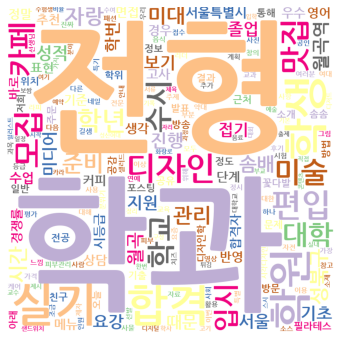

In [ ]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'   # 원하는 폰트 지정

wordcloud = WordCloud(
    max_words=200, #최대 수용 단어 갯수
    background_color='white', #배경색상
    font_path=font_path,
    width = 800, #넓이
    height = 800, #길이
    colormap='Accent_r')
    
wordcloud.generate_from_frequencies(dict(noun_count))

fig = plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
fig.savefig('/content/drive/MyDrive/Colab Notebooks/word_cloud.jpg')